# California Housing Prices
Dataset taken from : https://www.kaggle.com/datasets/camnugent/california-housing-prices

The aim of this code is to pre process the data in order to create models with the best scores.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import missingno as msno

In [8]:
df = pd.read_csv("/Users/Mustapha/Documents/Projet/Formation IA/Dataset/housing.csv")
df.info() # 207 values missing in column "total-bedrooms"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Since only 1% of the the values are missing in total_bedrooms, we can delete these rows

In [13]:
df.dropna(subset=['total_bedrooms'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Nombre d'outliers détectés : 511


InvalidIndexError: (array([   95,   104,   116,   283,   458,   483,   506,   509,   566,
         572,   858,   859,   865,   881,   916,   979,  1004,  1015,
        1033,  1054,  1207,  1226,  1228,  1231,  1232,  1270,  1498,
        1550,  1554,  1556,  1573,  1606,  1631,  1634,  1689,  1878,
        1902,  1919,  1968,  2297,  2375,  2380,  2940,  2991,  3153,
        3289,  3325,  3338,  3386,  3524,  3530,  3573,  3577,  3591,
        3618,  3759,  3908,  3946,  3961,  3995,  4000,  4023,  4062,
        4182,  4191,  4194,  4210,  4215,  4219,  4221,  4224,  4225,
        4226,  4228,  4229,  4312,  4513,  4515,  4525,  4536,  4539,
        4540,  4559,  4560,  4561,  4569,  4571,  4581,  4582,  4587,
        4588,  4590,  4591,  4595,  4599,  4623,  4625,  4631,  4639,
        4654,  5185,  5187,  5190,  5191,  5200,  5201,  5202,  5203,
        5215,  5218,  5224,  5234,  5247,  5249,  5272,  5290,  5295,
        5326,  5330,  5332,  5393,  5435,  5437,  5483,  5496,  5663,
        5753,  5829,  5859,  5862,  5902,  5920,  5991,  5993,  5997,
        5999,  6001,  6002,  6229,  6259,  6260,  6269,  6271,  6322,
        6330,  6332,  6446,  6448,  6519,  6520,  6633,  6655,  6664,
        7275,  7279,  7405,  8164,  8174,  8378,  8379,  8431,  8569,
        8626,  8627,  8638,  8710,  8714,  8715,  8737,  8743,  8751,
        8756,  8757,  8758,  8759,  8760,  8761,  8762,  8763,  8764,
        8785,  8786,  8788,  8799,  8894,  8895,  8913,  8922,  8924,
        8927,  8928,  8932,  8936,  8949,  8973,  8990,  9023,  9031,
        9042,  9044,  9054,  9062,  9074,  9075,  9078,  9080,  9091,
        9093,  9101,  9194,  9239,  9268,  9278,  9326,  9359,  9581,
        9583,  9586,  9588,  9602,  9621,  9649,  9653,  9716,  9782,
        9975,  9978,  9979, 10054, 10206, 10352, 10377, 10410, 10432,
       10546, 10566, 10620, 10639, 10653, 10656, 10734, 10801, 10811,
       10824, 10838, 10847, 10957, 11404, 11590, 11600, 11606, 11628,
       11658, 11668, 11714, 11716, 11717, 11753, 11795, 11843, 11872,
       11889, 11950, 11960, 11967, 11980, 11988, 11991, 11997, 12001,
       12010, 12014, 12019, 12034, 12073, 12074, 12076, 12083, 12086,
       12096, 12097, 12100, 12109, 12125, 12185, 12187, 12200, 12206,
       12207, 12221, 12222, 12228, 12229, 12233, 12236, 12240, 12243,
       12244, 12247, 12248, 12249, 12250, 12253, 12256, 12257, 12258,
       12259, 12264, 12266, 12267, 12268, 12276, 12277, 12284, 12288,
       12311, 12322, 12324, 12328, 12503, 12551, 12583, 12584, 12693,
       12696, 12747, 12751, 12833, 12836, 12912, 12919, 12929, 12957,
       12975, 12976, 13016, 13053, 13056, 13058, 13240, 13241, 13242,
       13244, 13247, 13251, 13252, 13253, 13256, 13261, 13296, 13297,
       13298, 13524, 13586, 13659, 13719, 13760, 13761, 13769, 13771,
       13783, 13785, 13786, 13790, 13794, 13795, 13803, 13807, 13808,
       13810, 13811, 13813, 13814, 13815, 13816, 13817, 13818, 13821,
       13822, 13826, 13827, 13829, 13831, 13832, 13833, 13834, 13835,
       13837, 13838, 13839, 13840, 13841, 13843, 13846, 13849, 13902,
       14074, 14332, 14366, 14403, 14413, 14418, 14543, 14615, 14664,
       14789, 14817, 14904, 14914, 14915, 14931, 14959, 15035, 15055,
       15067, 15072, 15083, 15093, 15162, 15188, 15189, 15212, 15264,
       15310, 15374, 15377, 15383, 15445, 15501, 15502, 15506, 15508,
       15537, 15541, 15546, 15585, 16013, 16435, 16439, 16462, 16484,
       16510, 16668, 16679, 16685, 16741, 16747, 16752, 16861, 16943,
       16944, 16946, 16947, 16954, 16968, 17002, 17006, 17247, 17294,
       17385, 17523, 17594, 17603, 17610, 17631, 17689, 17709, 17793,
       17804, 17880, 18029, 18036, 18165, 18172, 18177, 18184, 18186,
       18323, 18326, 18342, 18567, 18681, 18695, 18745, 18799, 18804,
       18825, 19175, 19776, 19778, 19888, 19891, 19892, 19893, 19909,
       19920, 19961, 20047, 20067, 20101, 20104, 20114, 20131, 20132,
       20219, 20222, 20235, 20246, 20320, 20323, 20422]), 'longitude')

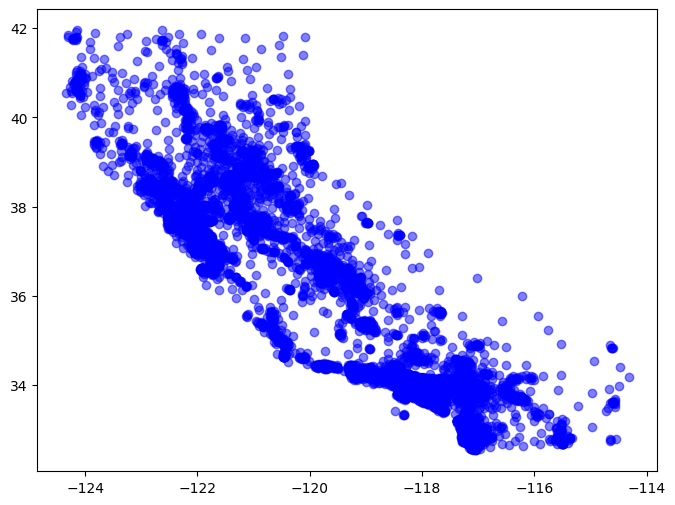

In [21]:
# Choose features
features = ["median_income", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households"]
X = df[features].values

# --- Mahalanobis detection ---
mean_vec = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahal_dist = []
for i in range(X.shape[0]):
    diff = X[i] - mean_vec
    d2 = np.dot(np.dot(diff, inv_cov_matrix), diff.T)
    mahal_dist.append(d2)

mahal_dist = np.array(mahal_dist)

# Seuil (ici : 97.5 percentile)
threshold = np.percentile(mahal_dist, 97.5)
outliers = np.where(mahal_dist > threshold)[0]

print(f"Nombre d'outliers détectés : {len(outliers)}")



# --- Visualisation (on ne peut que 2D/3D max) ---
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"], c="blue", alpha=0.5, label="Points normaux")
plt.scatter(df[outliers, "longitude"], df[outliers, "latitude"], c="red", label="Outliers")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Outliers détectés (Mahalanobis multivarié)")
plt.legend()
plt.show()

KeyError: '[1606, 3328, 9571, 18177] not found in axis'